In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.arange(10)[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [15]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
np.array([[1,2],[3,4]]).reshape(-1, 1)

array([[1],
       [2],
       [3],
       [4]])

In [17]:
np.arange(10).reshape(-1, 1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [18]:
position_i = np.arange(8)

In [19]:
position_i

array([0, 1, 2, 3, 4, 5, 6, 7])

In [20]:
position_i[np.newaxis, :]

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [21]:
i_ = np.arange(8).reshape(1, 8)
angle_rates = 1 / np.power(10000, (2 * (i_//2)) / np.float32(8))

In [22]:
i_, i_//2

(array([[0, 1, 2, 3, 4, 5, 6, 7]]),
 array([[0, 0, 1, 1, 2, 2, 3, 3]], dtype=int32))

In [27]:
for_sin = (i_//2)[:, 0::2]
for_cos = (i_//2)[:, 1::2]

In [28]:
for_sin, for_cos

(array([[0, 1, 2, 3]], dtype=int32), array([[0, 1, 2, 3]], dtype=int32))

In [23]:
angle_rates

array([[1.   , 1.   , 0.1  , 0.1  , 0.01 , 0.01 , 0.001, 0.001]])

In the positional scheme sin is applied to even indices of the embeddubg dimension (0, 2, 4, 6, 8, ...) positions and cos is applied to odd position (1, 3, 5, 7, 9, 11, ...). 

If we have 8 dimension embedding sin and cos will each take  4 4 embedding position alternatively for all sequence where each encoding is unique due to the POSITION of the sequence and angle_rate.

In [25]:
def get_positional_encoding(seq_length, d_model):
    """Generates positional encoding matrix for sequence length and dimension of model."""
    pos = np.arange(seq_length)[:, np.newaxis] # (seq_length, 1)
    i = np.arange(d_model)[np.newaxis, :] # (1, d_model)
    
    angle_rates = 1/np.power(10000, (2*(i//2))/np.float32(d_model))
    
    pos_enc = np.zeros((seq_length, d_model))
    pos_enc[:, 0::2] = np.sin(pos * angle_rates[:, 0::2])
    pos_enc[:, 1::2] = np.cos(pos * angle_rates[:, 1::2])
    
    return pos_enc

In [68]:
SEQUENCE_LENGTH = 8
DIM_MODEL = 2

In [69]:
pos_encoding = get_positional_encoding(SEQUENCE_LENGTH, DIM_MODEL)

In [66]:
# pos_encoding

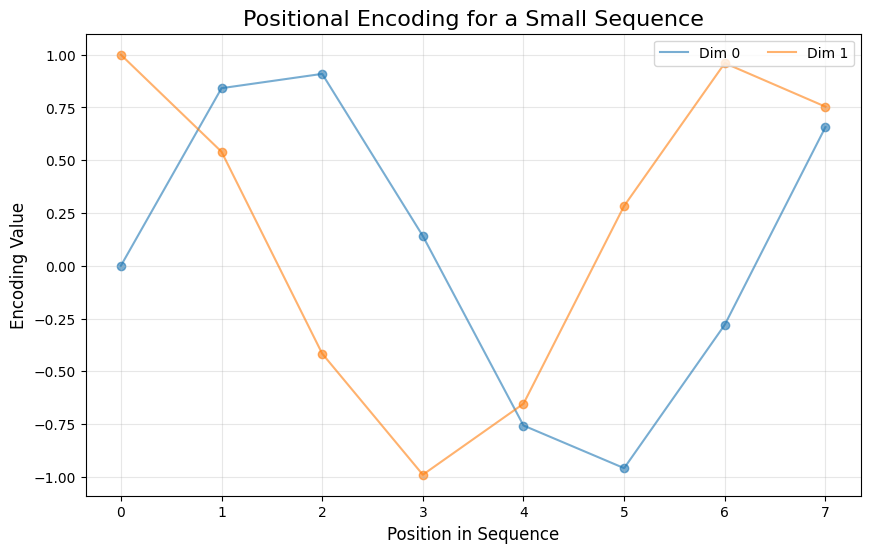

In [83]:
plt.figure(figsize=(10, 6))
for i in range(DIM_MODEL):
    plt.scatter(range(SEQUENCE_LENGTH), pos_encoding[:, i], alpha=0.6)
    plt.plot(range(SEQUENCE_LENGTH), pos_encoding[:, i], label=f'Dim {i}' if i < 5 else "", alpha=0.6)
plt.title("Positional Encoding for a Small Sequence", fontsize=16)
plt.xlabel("Position in Sequence", fontsize=12)
plt.ylabel("Encoding Value", fontsize=12)
plt.legend(loc='upper right', ncol=2, fontsize=10, frameon=True)
plt.grid(True, alpha=0.3)
plt.show()

In [94]:
def calculate_and_visualize_positional_encoding(seq_length, d_model):
    pos_encoding = get_positional_encoding(seq_length, d_model)
    
    plt.figure(figsize=(10, 6))
    for i in range(d_model):
        plt.plot(range(seq_length), pos_encoding[:, i], label=f'Dim {i}' if i < 5 else "", alpha=0.6)
    plt.title("Positional Encoding for a Small Sequence", fontsize=16)
    plt.xlabel("Position in Sequence", fontsize=12)
    plt.ylabel("Encoding Value", fontsize=12)
    plt.legend(loc='upper right', ncol=2, fontsize=10, frameon=True)
    plt.grid(True, alpha=0.3)
    plt.show()

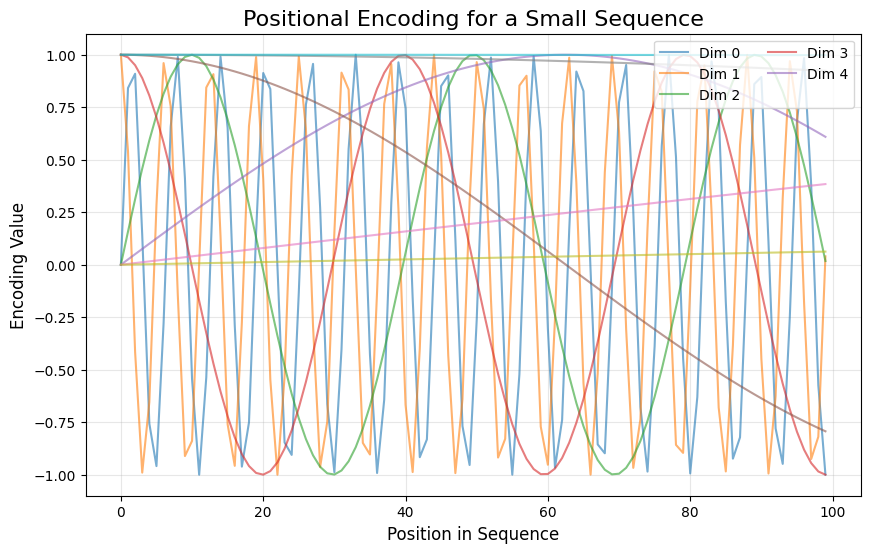

In [103]:
calculate_and_visualize_positional_encoding(100,10)

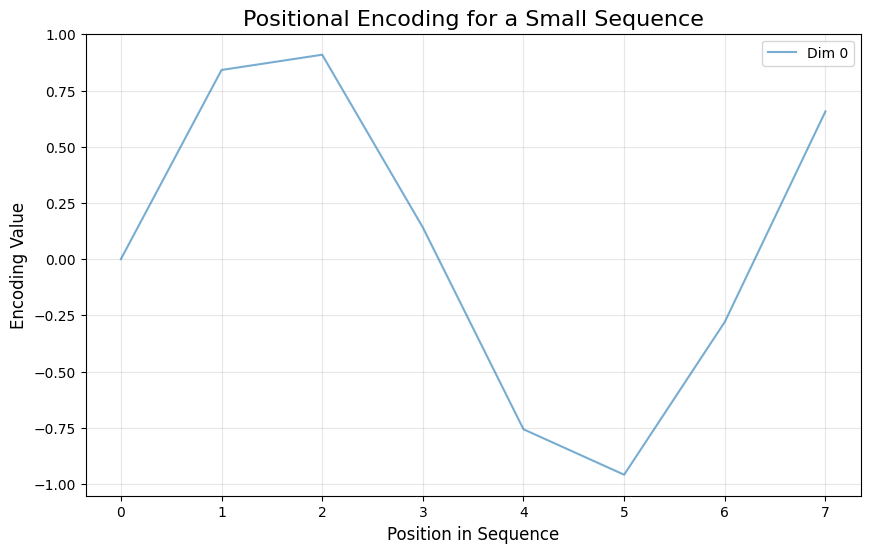

In [127]:
calculate_and_visualize_positional_encoding(8, 1) # for 8 sequences to represent in 1 dimension only sin is used since only position 0 of dimension is used

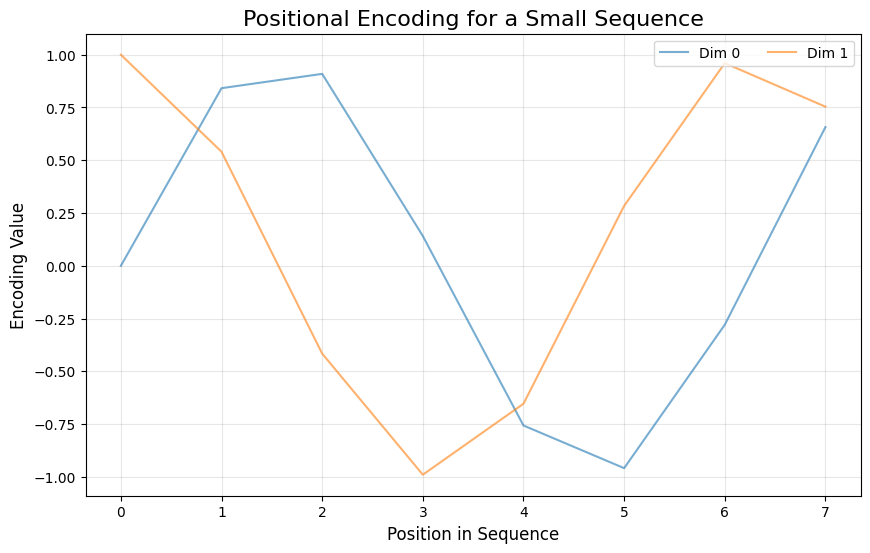

In [128]:
calculate_and_visualize_positional_encoding(8, 2) # for 8 sequences to represent in 2 dimension sine and cosine is used for 0 and 1 position in dimension